# Data and functions

In [1]:
shhh <- suppressPackageStartupMessages # It's a library, so shhh!

shhh(suppressWarnings(library(ggplot2)))   # for plotting results
shhh(suppressWarnings(library(gridExtra))) # for adding plots together
shhh(suppressWarnings(library(grid)))      # for plot grid title formatting
shhh(suppressWarnings(library(gtools)))    # for converting pvalues to stars
shhh(suppressWarnings(library(Hmisc)))
shhh(suppressWarnings(library(plyr)))      # for ddply (aggregating results)
shhh(suppressWarnings(library(tidyr)))     # for creating long table (function gather)
shhh(suppressWarnings(library(multcomp)))  # for multiple comparison tests
shhh(suppressWarnings(library(varhandle))) # for unfactoring variables
shhh(suppressWarnings(library(Rmisc)))     # for getting summary data frame

shhh(suppressWarnings(library(tidyverse)))
shhh(suppressWarnings(library(ggpubr)))
shhh(suppressWarnings(library(rstatix)))

In [3]:
# Load percent-signal-change data
data_psc <- read.csv('data/psc.csv')
data_psc$roi = as.factor(data_psc$roi)
data_psc$subid = as.factor(data_psc$subid)
# Load behavioural data
data_beh <- read.csv('data/behavioural.csv')
data_beh$subid = as.factor(data_beh$subid)

# SIF data only from the behavioural
data_sif <- subset(data_beh[c(1:5)])
data_sif  <- data_sif [complete.cases(data_sif ),]

# Intrusion data only from the behavioural
data_intr <- subset(data_beh[c(1:3,7:ncol(data_beh))])
data_intr  <- data_intr [complete.cases(data_intr ),]

# Merge SIF and Intrusion data
data_sif.intr <- merge(data_sif, data_intr[c(3:ncol(data_intr))], by = 'subid')

# Merge SIF and PSC data
data_sif.psc <- merge(data_sif, data_psc[c(3:ncol(data_psc))], by = 'subid')

# Merge Intrusion and PSC data
data_intr.psc <- merge(data_intr, data_psc[c(3:ncol(data_psc))], by = 'subid')

In [15]:
# FUNCTION FOR PLOTTING CORRELATIONS
# ------------------------------------
plotCorrelation <-
  function(dataset,
           x,
           y,
           xLabel,
           yLabel) {
    corr.grey.roi  <- rcorr(x, y)
    resTXT  <- sprintf("r = %.3f, p = %.10f",
                       corr.grey.roi$r[2],
                       corr.grey.roi$P[2])
    
    ggplot(dataset, aes(x, y)) +
      geom_smooth(
        method = lm,
        level = 0.95,
        color = "black",
        fill = "grey",
        size = 0.3
      ) +
      geom_point(
        colour = "black",
        alpha = .8,
        fill = "orange",
        size = 3,
        stroke = 0.2,
        shape = 21
      ) +
      labs(x = xLabel, y = yLabel) + ggtitle(resTXT) +
      theme_minimal() +
      theme(
        text = element_text(size = 14),
        plot.title = element_text(
          hjust = 0.5,
          size = 14,
          face = "bold"
        ),
        plot.background = element_rect(
          colour = "lightgrey",
          size = 0.4,
          linetype = "dotted"
        ),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()
      )
  }

In [59]:


data_psc.sif.ms <- subset(data_psc.sif, data_psc.sif$roi == 'ch12')
head(data_psc.sif.ms)

,subid,id,stid,model,rID,roi,T,NT,coverage,SIF,zSIF
,<fct>,<int>,<chr>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,01_Levy1s_604,1,01_Levy1,model_00,1,ch12,0.007320232,0.02350285,99.60630,9.090909,0.3940354
12,01_Levy1s_635,1,01_Levy1,model_00,1,ch12,-0.038192853,-0.02542412,100.00000,2.651515,-0.5392063
26,01_Levy1s_639,1,01_Levy1,model_00,1,ch12,-0.019886187,-0.03645123,96.46643,12.500000,0.8881045
38,01_Levy1s_679,1,01_Levy1,model_00,1,ch12,-0.041203754,-0.15598856,93.69369,15.151515,1.2723805
48,01_Levy1s_680,1,01_Levy1,model_00,1,ch12,-0.037150442,-0.03642902,100.00000,9.090909,0.3940354
54,01_Levy1s_766,1,01_Levy1,model_00,1,ch12,-0.062691836,-0.02872113,83.63171,12.500000,0.8881045


`geom_smooth()` using formula 'y ~ x'



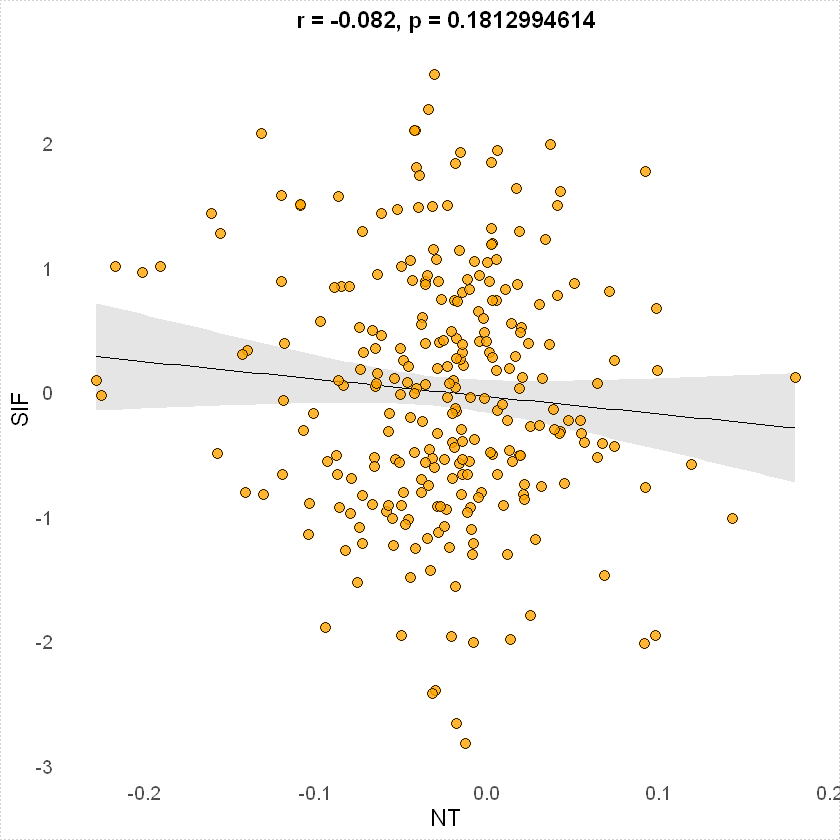

In [66]:
plotCorrelation(data_psc.sif.ms,
           data_psc.sif.ms$NT,
           data_psc.sif.ms$zSIF,
           "NT",
           "SIF")